# Gramener Case Study


<TBD>

## Contents
 - <a href="#Overview">Overview</a>
 - <a href="#dataSourcing">Data Sourcing</a>
     - <a href="#dataDictionary">Data Dictionary</a>
     - <a href="#dataCleanup">Data Cleanup</a>
     - <a href="#analysisToDropColumns">Analysis to drop columns</a>
 - <a href="#EDA">Exploratory Data Analysis (EDA)</a>  
     - <a href="#EDA">Analysis of Consumer and Loan Attributes that influence the tendency of default</a>  
         - <a href="#Grade">Grade</a>
         - <a href="#LoanAmount">Loan Amount</a>
         - <a href="#LoanTerm">Loan Term</a>
         - <a href="#LoanInterestRate">Loan Interest Rate</a>
         - <a href="#AnnualIncome">Annual Income</a>
         - <a href="#DTI">Debt to Income Ratio</a>
         - <a href="#HomeOwnership">Home Ownership</a>
         - <a href="#lengthOfEmployment">Length of Employment</a>
     - <a href="#univariateAnalysis">Univariate Analysis </a>  
         - <a href="#loanStatusTrend">Loan Status Trend</a>
         - <a href="#purposeTrendAnalysis">Purpose Trend Analysis</a>
         - <a href="#gradeInterestRateTrendAnalysis">Grade/Interest Rate Trend Analysis</a>
         - <a href="#annualIncomeAnalysis">Annual Income Analysis</a>
         - <a href="#loanTermanalysis">Loan Term analysis</a>
         - <a href="#borrowersEmploymentLengthAnalysis">Borrower's Employment Length Analysis</a>
         - <a href="#statewiseAnalysis">State-wise Analysis</a>
         - <a href="#OtherNumericaldataAnalysis">Other Numerical data analysis</a>
     - <a href="#segmentedUnivariateAnalysis">Segmented Univariate Analysis</a>  
         - <a href="#loanStatusPurposeAnalysis">Loan Status - Purpose Analysis</a>
         - <a href="#LoanStatusVsRegion">Loan Status Vs Region</a>
         - <a href="#LoanStatusVsVerificationStatus">Loan Status Vs Verification Status</a>
     - <a href="#BivariateAnalysis">Bivariate Analysis</a>  
         - <a href="#LoanAmountIssuedovertheyears">Loan Amount issued over the years</a>
         - <a href="#PurposeVsGrade">Purpose Vs Grade</a>
         - <a href="#corr">Correlation between Loan amount, funded amount, dti & revol_bal</a>
 - <a href="#Summary">Summary</a>
       
 <br><br><br><br>

### <div id="Overview"></div>  Overview

LendingClub is the largest online loan marketplace, facilitating personal loans, business loans, and financing of medical procedures. Borrowers can easily access lower interest rate loans through a fast online interface.
The company wants to understand the driving factors (or driver variables) behind loan default, i.e. the variables which are strong indicators of default. The company can utilise this knowledge for its portfolio and risk assessment.
This notebook is an exploratory analysis on the loan data over the period 2007-11 to gain insights on key drivers behind chargedoff loans.

### <div id="dataSourcing"></div>  Data Sourcing

In [24]:
# Supress Warnings
import warnings
warnings.filterwarnings('ignore')

# loading libraries and reading the data
import numpy as np
import pandas as pd
from datetime import datetime
pd.options.display.float_format = '{:.2f}'.format

import matplotlib.pyplot as plt
from matplotlib.ticker import StrMethodFormatter
import seaborn as sns


%matplotlib inline
sns.set(style='white', font_scale=0.9)

#Set dataframe cloumns width to max
pd.set_option('display.max_columns', None)

# Set file paths for all data files
loanDataFilePath=r'loan.csv'
dataDictionaryFielPath=r'Data_Dictionary.xlsx'

In [25]:
# Read csv files into DataFrames. Handled to remove encoding issues in data.
loans= pd.read_csv(loanDataFilePath, encoding ='latin1')
loans.head(5)

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.00,36 months,10.65%,162.87,B,B2,NaN,10+ years,RENT,24000.00,Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I need to upgra...,credit_card,Computer,860xx,AZ,27.65,0,Jan-85,1,nan,nan,3,0,13648,83.70%,9,f,0.00,0.00,5863.16,5833.84,5000.00,863.16,0.00,0.00,0.00,Jan-15,171.62,NaN,May-16,0.00,nan,1,INDIVIDUAL,nan,nan,nan,0,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,0.00,0,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,0.00,0.00,nan,nan,nan,nan
1,1077430,1314167,2500,2500,2500.00,60 months,15.27%,59.83,C,C4,Ryder,< 1 year,RENT,30000.00,Source Verified,Dec-11,Charged Off,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I plan to use t...,car,bike,309xx,GA,1.00,0,Apr-99,5,nan,nan,3,0,1687,9.40%,4,f,0.00,0.00,1008.71,1008.71,456.46,435.17,0.00,117.08,1.11,Apr-13,119.66,NaN,Sep-13,0.00,nan,1,INDIVIDUAL,nan,nan,nan,0,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,0.00,0,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,0.00,0.00,nan,nan,nan,nan
2,1077175,1313524,2400,2400,2400.00,36 months,15.96%,84.33,C,C5,NaN,10+ years,RENT,12252.00,Not Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,NaN,small_business,real estate business,606xx,IL,8.72,0,Nov-01,2,nan,nan,2,0,2956,98.50%,10,f,0.00,0.00,3005.67,3005.67,2400.00,605.67,0.00,0.00,0.00,Jun-14,649.91,NaN,May-16,0.00,nan,1,INDIVIDUAL,nan,nan,nan,0,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,0.00,0,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,0.00,0.00,nan,nan,nan,nan
3,1076863,1277178,10000,10000,10000.00,36 months,13.49%,339.31,C,C1,AIR RESOURCES BOARD,10+ years,RENT,49200.00,Source Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/21/11 > to pay for prop...,other,personel,917xx,CA,20.00,0,Feb-96,1,35.00,nan,10,0,5598,21%,37,f,0.00,0.00,12231.89,12231.89,10000.00,2214.92,16.97,0.00,0.00,Jan-15,357.48,NaN,Apr-16,0.00,nan,1,INDIVIDUAL,nan,nan,nan,0,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,0.00,0,nan,nan,nan,nan,nan,nan,nan,nan,nan,

In [26]:
 pd.reset_option('display.max_columns')

In [27]:
# Check total rows and columns in the loan Dataset
loans.shape

### 39717 loan records are available with 111 attributes - customer and loan.

(39717, 111)

### <div id="dataDictionary"></div>  Data Dictionary

In [28]:
data_desc = pd.read_excel(dataDictionaryFielPath)
data_desc[data_desc['LoanStatNew'].isin(list(loans))]

,LoanStatNew,Description
0,acc_now_delinq,The number of accounts on which the borrower i...
1,acc_open_past_24mths,Number of trades opened in past 24 months.
2,addr_state,The state provided by the borrower in the loan...
3,all_util,Balance to credit limit on all trades
4,annual_inc,The self-reported annual income provided by th...
5,annual_inc_joint,The combined self-reported annual income provi...
6,application_type,Indicates whether the loan is an individual ap...
7,avg_cur_bal,Average current balance of all accounts
8,bc_open_to_buy,Total open to buy on revolving bankcards.
9,bc_util,Ratio of total current balance to high credit/...


### <div id="dataCleanup"></div>  Data Cleanup

In [29]:
# Find for duplicate data in the dataset.
loans[loans.duplicated(keep=False)]

### No duplicates seen in dataset.

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit


In [30]:
#Drop cloumns with only nUll values 
loans=loans.dropna(axis=1,how='all')
loans.shape

(39717, 57)

In [31]:
#Column wise pecentage null values
loans.isnull().sum(axis=0)
round(100*(loans.isnull().sum()/len(loans.index)), 2)

id                            0.00
member_id                     0.00
loan_amnt                     0.00
funded_amnt                   0.00
funded_amnt_inv               0.00
term                          0.00
int_rate                      0.00
installment                   0.00
grade                         0.00
sub_grade                     0.00
emp_title                     6.19
emp_length                    2.71
home_ownership                0.00
annual_inc                    0.00
verification_status           0.00
issue_d                       0.00
loan_status                   0.00
pymnt_plan                    0.00
url                           0.00
desc                         32.58
purpose                       0.00
title                         0.03
zip_code                      0.00
addr_state                    0.00
dti                           0.00
delinq_2yrs                   0.00
earliest_cr_line              0.00
inq_last_6mths                0.00
mths_since_last_deli

In [32]:
#drop columns whos null percentage is more than 50%
loans=loans.drop(['next_pymnt_d','mths_since_last_delinq','mths_since_last_record'], axis=1)

### <div id="analysisToDropColumns"></div>  Analysis to drop columns
###### acc_now_delinq & delinq_amnt : 
Its having only one value '0' , Which states customer was not deliquent and this column will not be useful for analysis.
###### application_type : 
Its contains value 'INDIVIDUAL' , So data has been provided for only individuals and this column will not be useful for analysis.
###### chargeoff_within_12_mths & collections_12_mths_ex_med: 
Its having either '0' or 'NA' , Which can be drop since we have a current loan status of customer .
##### initial_list_status  & policy_code & pymnt_plan & tax_liens: 
Its contains only one value/ unique  value, WHich will not be useful for analysis. 
##### collection_recovery_fee : 
Its recovery fee and so its will not be helpful to find the risky applicants.
##### 'url' &  'desc' : 
This columns will  not be useful for analyis

In [33]:
#drop unnecessary columns 
dropclns = ['acc_now_delinq','application_type','chargeoff_within_12_mths','collections_12_mths_ex_med','initial_list_status',
            'policy_code','pymnt_plan','tax_liens','collection_recovery_fee','url','desc']
loans=loans.drop(dropclns, axis=1)

In [34]:
# Converting zip code to numbric by removing the X coded
loans['zip_code'] = loans['zip_code'].apply(lambda s: int(s[:-2]))
#Make nulls to default values 
loans["pub_rec_bankruptcies"].fillna(0.0, inplace=True)
loans["revol_util"].fillna(0.0, inplace=True)
loans.dtypes

id                        int64
member_id                 int64
loan_amnt                 int64
funded_amnt               int64
funded_amnt_inv         float64
term                     object
int_rate                 object
installment             float64
grade                    object
sub_grade                object
emp_title                object
emp_length               object
home_ownership           object
annual_inc              float64
verification_status      object
issue_d                  object
loan_status              object
purpose                  object
title                    object
zip_code                  int64
addr_state               object
dti                     float64
delinq_2yrs               int64
earliest_cr_line         object
inq_last_6mths            int64
open_acc                  int64
pub_rec                   int64
revol_bal                 int64
revol_util               object
total_acc                 int64
out_prncp               float64
out_prnc

In [35]:
round(100*(loans.isnull().sum()/len(loans.index)), 2)

id                     0.00
member_id              0.00
loan_amnt              0.00
funded_amnt            0.00
funded_amnt_inv        0.00
term                   0.00
int_rate               0.00
installment            0.00
grade                  0.00
sub_grade              0.00
emp_title              6.19
emp_length             2.71
home_ownership         0.00
annual_inc             0.00
verification_status    0.00
issue_d                0.00
loan_status            0.00
purpose                0.00
title                  0.03
zip_code               0.00
addr_state             0.00
dti                    0.00
delinq_2yrs            0.00
earliest_cr_line       0.00
inq_last_6mths         0.00
open_acc               0.00
pub_rec                0.00
revol_bal              0.00
revol_util             0.00
total_acc              0.00
out_prncp              0.00
out_prncp_inv          0.00
total_pymnt            0.00
total_pymnt_inv        0.00
total_rec_prncp        0.00
total_rec_int       

In [36]:
# derive number of years of exp as number value.
loans['emp_length_years'] = loans['emp_length'].str.split(' y', 1).str[0].str.strip()
loans['emp_length_years'] = loans['emp_length_years'].str.replace ('< ', '')
loans['emp_length_years'] = loans['emp_length_years'].str.replace ('+', '')
loans['emp_length_years'] =pd.to_numeric(loans['emp_length_years'] )

#Get the median age 
loans['emp_length_years'].median()

### Apply 4 years of exp for the records where exp is NA.
loans.emp_length_years=loans.emp_length_years.fillna(4)

In [37]:
# Convert Int rate and term to numeric for furture analysis
loans['intrate_int']=loans['int_rate'].str.split('%',1).str[0].str.strip()
loans['term_int']=loans['term'].str.split('m',1).str[0].str.strip()

loans['intrate_int']=pd.to_numeric(loans['intrate_int'])
loans['term_int']=pd.to_numeric(loans['term_int'])

# create year column for issue date 
loans['issue_yr']=loans['issue_d'].str.split('-',1).str[1]

In [38]:
# Business objective of this case study is to identify Loan Applicants who are likley to 'Default' using EDA.
# Let us create a new Field 'loan_default_flag'
# 'loan_default_flag' has two values- 0 and 1. 0 means loan will be repaid and 1 means Loan is unlikley to be repaid

# Function to set the value of  'loan_default_flag' 
def GetLoanDefaultFlag(Loan_Status):
    if Loan_Status in ['Current', 'Fully Paid']:
        return 0
    else:
        return 1 

# Update 'loan_default_flag' value   
loans['loan_default_flag'] = loans['loan_status'].apply(lambda x: GetLoanDefaultFlag(x))
loans.head(5)

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,delinq_amnt,pub_rec_bankruptcies,emp_length_years,intrate_int,term_int,issue_yr,loan_default_flag
0,1077501,1296599,5000,5000,4975.00,36 months,10.65%,162.87,B,B2,...,Jan-15,171.62,May-16,0,0.00,10.00,10.65,36,11,0
1,1077430,1314167,2500,2500,2500.00,60 months,15.27%,59.83,C,C4,...,Apr-13,119.66,Sep-13,0,0.00,1.00,15.27,60,11,1
2,1077175,1313524,2400,2400,2400.00,36 months,15.96%,84.33,C,C5,...,Jun-14,649.91,May-16,0,0.00,10.00,15.96,36,11,0
3,1076863,1277178,10000,10000,10000.00,36 months,13.49%,339.31,C,C1,...,Jan-15,357.48,Apr-16,0,0.00,10.00,13.49,36,11,0
4,1075358,1311748,3000,3000,3000.00,60 months,12.69%,67.79,B,B5,...,May-16,67.79,May-16,0,0.00,1.00,12.69,60,11,0


In [39]:
# Employee service/experience 
loans['emp_length_years'].value_counts()

10.00    8879
1.00     7823
4.00     4511
2.00     4388
3.00     4095
5.00     3282
6.00     2229
7.00     1773
8.00     1479
9.00     1258
Name: emp_length_years, dtype: int64

In [40]:
# Get numeric value of interest rate
loans['int_rate']=loans['int_rate'].str.replace('%','').astype(float)

In [41]:
# Checking field 'purpose' values
loans['purpose'].value_counts()
# Majority of the loan is for the purpose of 'debt_consolidation'

debt_consolidation    18641
credit_card            5130
other                  3993
home_improvement       2976
major_purchase         2187
small_business         1828
car                    1549
wedding                 947
medical                 693
moving                  583
house                   381
vacation                381
educational             325
renewable_energy        103
Name: purpose, dtype: int64

### <div id="EDA"></div>  Exploratory Data Analysis (EDA)
As part of EDA, we will analyse how following consumer attributes and loan attributes influence the tendency of default
- Grade
- Loan Amount
- Loan Term
- Loan Interest Rate
- Annual Income
- Debt to Income Ratio
- Home Ownership
- Length of Employment


### <div id="Grade"></div>  Grade
The grade of the loan is the companies estimate of the likelihood of default for the given loan. The grades are assigned as A,B,C,D,E,F,G and H, in the ascending order of the likelihood of repayment of loan. e.g. A grade means there is least chances of default. <br/><br/>
We need to check, if the grade of the loan actually correlates to whether a loan will have a late payment or not

In [42]:
# Checking value of 'grades'
loans['grade'].value_counts().sort_index()

A    10085
B    12020
C     8098
D     5307
E     2842
F     1049
G      316
Name: grade, dtype: int64

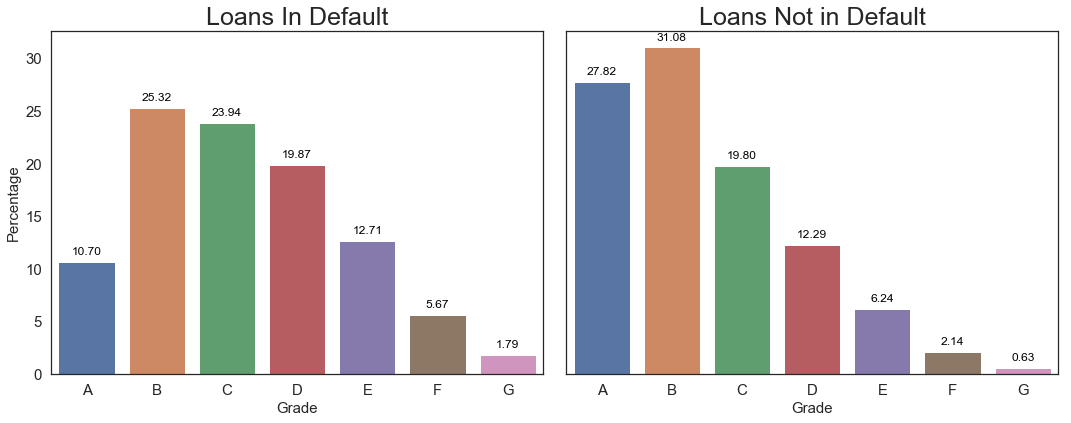

In [43]:
loanNotInDefault = len(loans[loans['loan_default_flag'] == 0])
loanInDefault = len(loans[loans['loan_default_flag'] == 1])

f, (ax1, ax2) = plt.subplots(1, 2, sharey=True, figsize=(15, 6))

g1=sns.barplot(x='grade', y='id', data=loans[loans['loan_default_flag'] == 1],
            estimator=lambda x: len(x) / (loanInDefault) * 100,
            ax=ax1, order=sorted(loans['grade'].unique()), palette='deep')

g2=sns.barplot(x='grade', y='id', data=loans[loans['loan_default_flag'] == 0], 
            estimator=lambda x: len(x) / (loanNotInDefault) * 100,
            ax=ax2, order=sorted(loans['grade'].unique()), palette='deep')

ax1.set_title('Loans In Default',fontsize=25)
ax1.set_ylabel('Percentage',fontsize=15)
ax2.set_title('Loans Not in Default',fontsize=25)
ax2.set_ylabel('',fontsize=15)
ax1.set_xlabel('Grade',fontsize=15)
ax2.set_xlabel('Grade',fontsize=15)
ax1.tick_params(labelsize=15)
ax2.tick_params(labelsize=15)

ax=g1
for p in ax.patches:
    ax.annotate("%.2f" % p.get_height(), (p.get_x() + p.get_width() / 2., p.get_height()),
                 ha='center', va='center', fontsize=12, color='black', xytext=(0, 10),
                 textcoords='offset points')
ax=g2
for p in ax.patches:
    ax.annotate("%.2f" % p.get_height(), (p.get_x() + p.get_width() / 2., p.get_height()),
                 ha='center', va='center', fontsize=12, color='black', xytext=(0, 10),
                 textcoords='offset points')
 
plt.tight_layout()
plt.show()

- #### Observations
    - Best graded loans are A and B. These loans have a higher percentage of loans with no default
    - C grade loan is approximately the same percentage across no default and default 
    - Least graded loans (D, E, F and G) have a higher percentage of loans in default than with no default

### <div id="LoanAmount"></div>  Loan Amount
Let us check, if the loan amount actually correlates to whether a loan will have a repayment or defaults

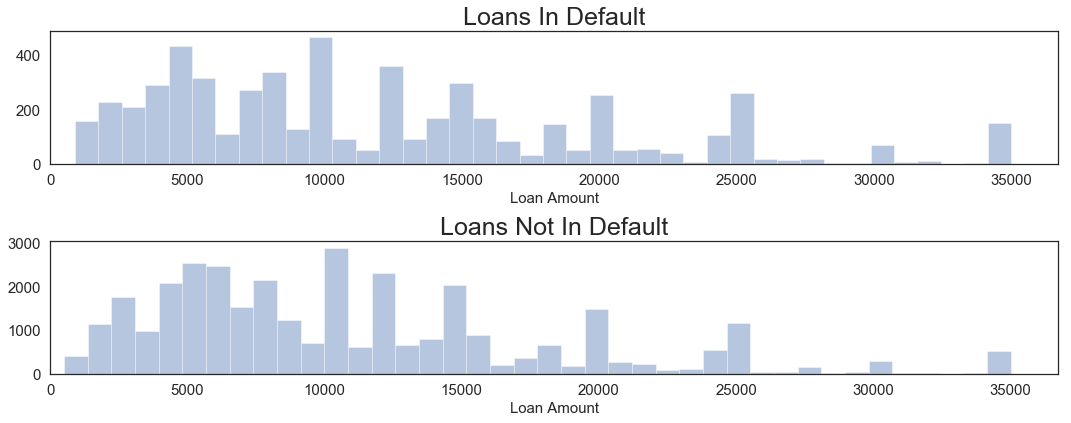

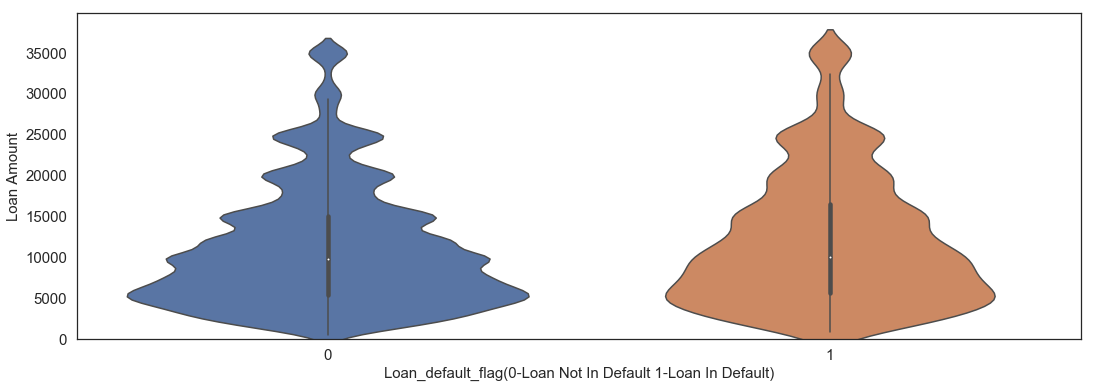

In [44]:
# Histograms
f, (ax1, ax2) = plt.subplots(2, 1, figsize=(15, 6))

sns.distplot(loans[loans['loan_default_flag'] == 1]['loan_amnt'], bins=40, ax=ax1, kde=False)
sns.distplot(loans[loans['loan_default_flag'] == 0]['loan_amnt'], bins=40, ax=ax2, kde=False)

ax1.set_title('Loans In Default',fontsize=25)
ax2.set_title('Loans Not In Default',fontsize=25)
ax1.set_xlabel('Loan Amount',fontsize=15)
ax2.set_xlabel('Loan Amount',fontsize=15)
ax1.tick_params(labelsize=15)
ax2.tick_params(labelsize=15)

ax1.set_xbound(lower=0)
ax2.set_xbound(lower=0)

plt.tight_layout()
plt.show()

# violinplot
plt.figure(figsize=(18,6))
ax = sns.violinplot(x='loan_default_flag', y='loan_amnt', data=loans)
ax.set_ybound(lower=0)
ax.set_xlabel('Loan_default_flag(0-Loan Not In Default 1-Loan In Default)',fontsize=15)
ax.set_ylabel('Loan Amount',fontsize=15)
ax.tick_params(labelsize=15)
plt.show()

- #### Observations
    - No significant change in distribution pattern for both 'Loan Not In Default' and 'Loan In Default' wrt to loan amount

### <div id="LoanTerm"></div>  Loan Term
Let us check, if the loan term actually correlates to whether a loan will have a repayment or defaults

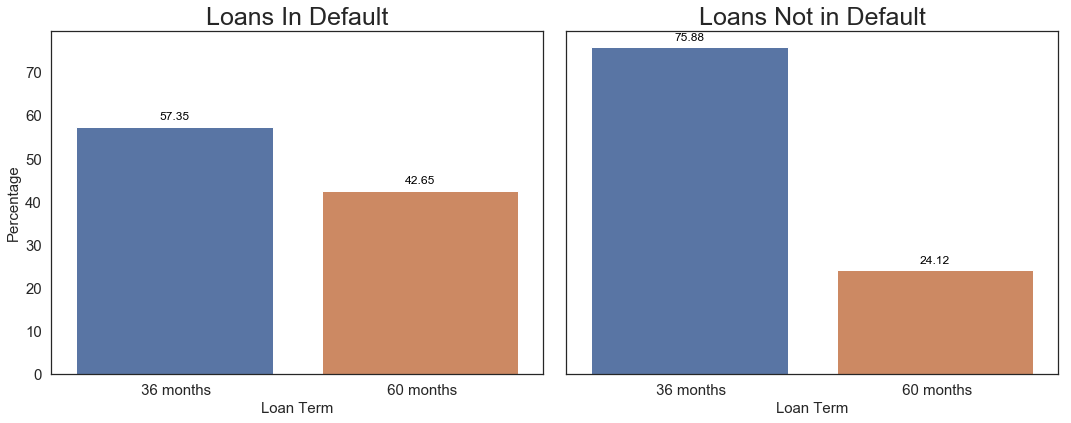

In [45]:
loanNotInDefault = len(loans[loans['loan_default_flag'] == 0])
loanInDefault = len(loans[loans['loan_default_flag'] == 1])

f, (ax1, ax2) = plt.subplots(1, 2, sharey=True, figsize=(15, 6))

g1=sns.barplot(x='term', y='id', data=loans[loans['loan_default_flag'] == 1], 
            estimator=lambda x: len(x) / loanInDefault * 100,
            ax=ax1, order=sorted(loans['term'].unique()), palette='deep')
g2=sns.barplot(x='term', y='id', data=loans[loans['loan_default_flag'] == 0], 
            estimator=lambda x: len(x) / loanNotInDefault * 100,
            ax=ax2, order=sorted(loans['term'].unique()), palette='deep')


ax1.set_title('Loans In Default',fontsize=25)
ax1.set_xlabel('Loan Term',fontsize=15)
ax1.set_ylabel('Percentage',fontsize=15)
ax2.set_title('Loans Not in Default',fontsize=25)
ax2.set_ylabel('')
ax2.set_xlabel('Loan Term',fontsize=15)
ax1.tick_params(labelsize=15)
ax2.tick_params(labelsize=15)

ax=g1
for p in ax.patches:
    ax.annotate("%.2f" % p.get_height(), (p.get_x() + p.get_width() / 2., p.get_height()),
                 ha='center', va='center', fontsize=12, color='black', xytext=(0, 10),
                 textcoords='offset points')
ax=g2
for p in ax.patches:
    ax.annotate("%.2f" % p.get_height(), (p.get_x() + p.get_width() / 2., p.get_height()),
                 ha='center', va='center', fontsize=12, color='black', xytext=(0, 10),
                 textcoords='offset points')
 
plt.tight_layout()
plt.show()

- #### Observations
    - The longer term loans (60 months) have a higher percentage of the defaults than the non-defaulting loans.
    - The shorter term loans (30 months) have a lesser percentage of the defaults than the non-defaulting loans.

### <div id="LoanInterestRate"></div>  Loan Interest Rate
Let us check, if the loan interest iate actually correlates to whether a loan will have a repayment or defaults

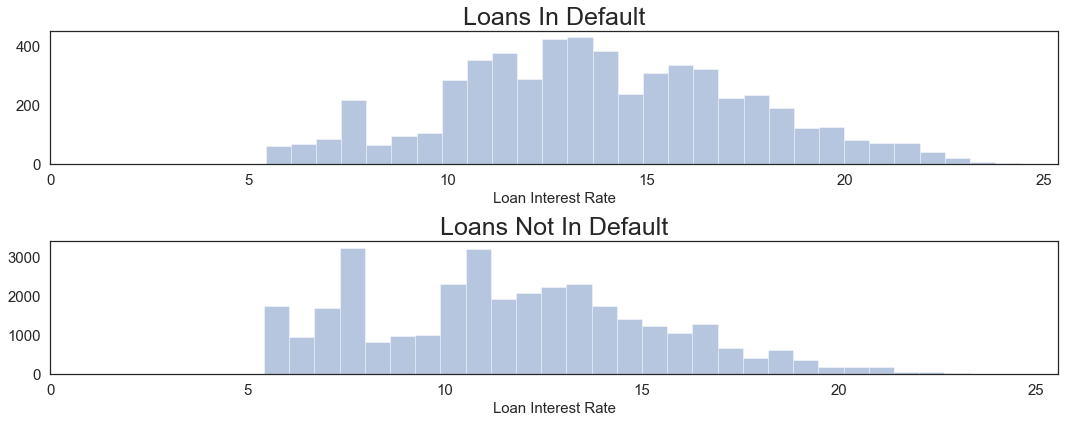

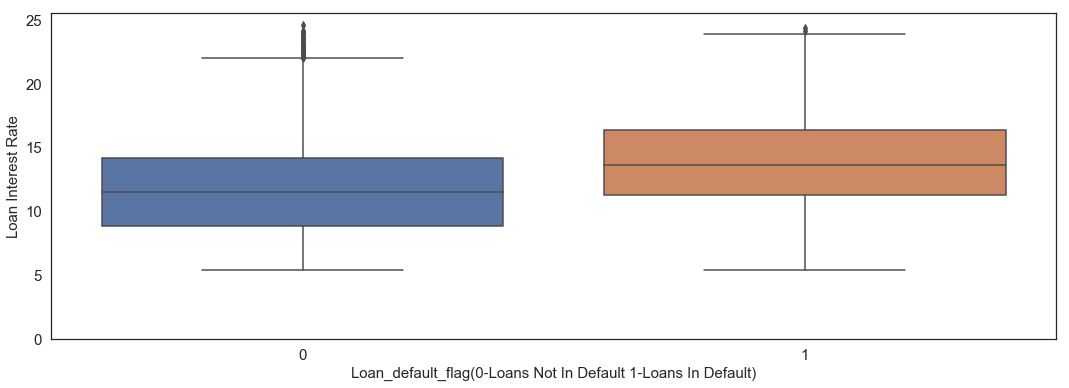

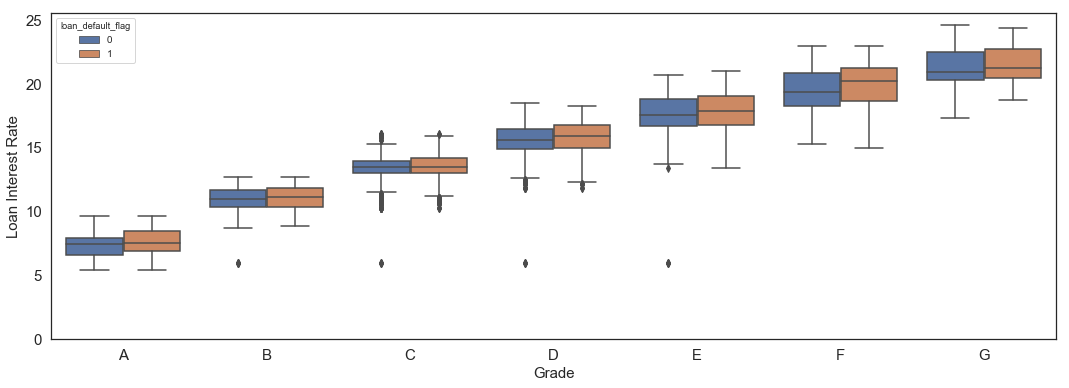

Text(0.5,1,'Charged Off Loans - Interest Rate distribution')

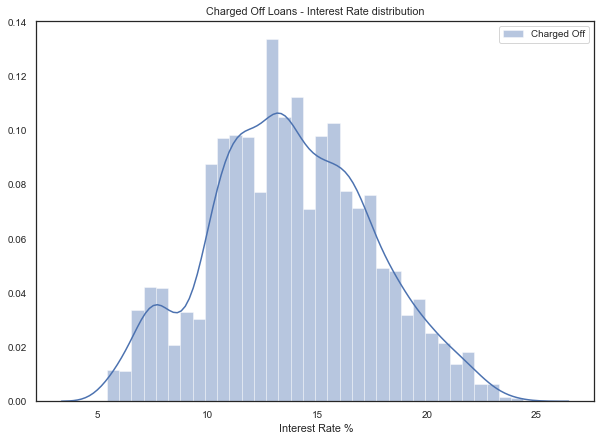

In [46]:
# Interest Rate

# Histograms
f, (ax1, ax2) = plt.subplots(2, 1, figsize=(15, 6))

ax1=sns.distplot(loans[loans['loan_default_flag'] == 1]['int_rate'], bins=30, ax=ax1, kde=False)
ax2=sns.distplot(loans[loans['loan_default_flag'] == 0]['int_rate'], bins=30, ax=ax2, kde=False)

ax1.set_xlabel('Loan Interest Rate',fontsize=15)
ax2.set_xlabel('Loan Interest Rate',fontsize=15)
ax1.set_title('Loans In Default',fontsize=25)
ax2.set_title('Loans Not In Default',fontsize=25)
ax1.tick_params(labelsize=15)
ax2.tick_params(labelsize=15)
ax1.set_xbound(lower=0)
ax2.set_xbound(lower=0)

plt.tight_layout()
plt.show()

plt.figure(figsize=(18,6))
ax = sns.boxplot(x='loan_default_flag', y='int_rate', data=loans)
ax.set_ybound(lower=0)
ax.set_xlabel('Loan_default_flag(0-Loans Not In Default 1-Loans In Default)',fontsize=15)
ax.set_ylabel('Loan Interest Rate',fontsize=15)
ax.tick_params(labelsize=15)
plt.show()

plt.figure(figsize=(18,6))
ax = sns.boxplot(x='grade', y='int_rate', data=loans, hue='loan_default_flag', 
                     order=sorted(loans['grade'].unique()))
ax.set_ybound(lower=0)
ax.set_xlabel('Grade',fontsize=15)
ax.set_ylabel('Loan Interest Rate',fontsize=15)
ax.tick_params(labelsize=15)
plt.show()

plt.figure(figsize=(10,7))

# Charged Off Loans - Interest Rate distribution
sns.distplot(loans[(loans['loan_status']=='Charged Off')]['intrate_int'],label='Charged Off')
plt.legend()
plt.xlabel(" Interest Rate %")
plt.title("Charged Off Loans - Interest Rate distribution")

- #### Observations
    - Loans in default have higher interest rates
    - This is true for all grades of loan (A,B,C,D,E,F and G)
    - It is seen loans provided with interest rate >10% and <17.5% have higher chances of defaulting

### <div id="AnnualIncome"></div> Annual Income
Let us check, if the annual income correlates to whether a loan will have a repayment or defaults

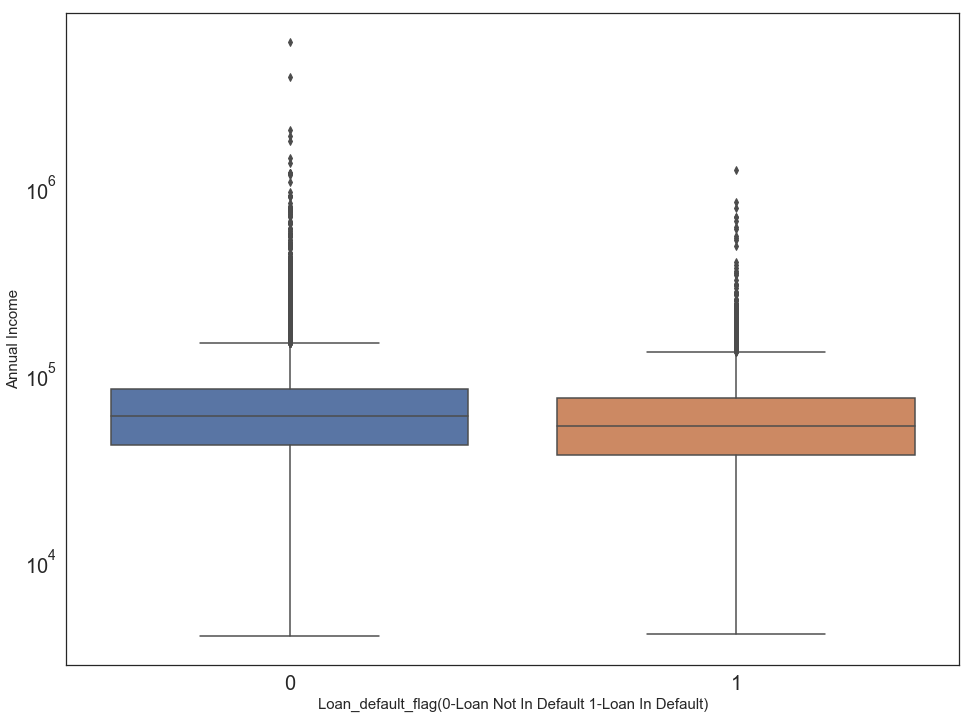

In [47]:
### Annual Income
plt.figure(figsize=(16,12))
ax1 = sns.boxplot(x='loan_default_flag', y='annual_inc', data=loans)
ax1.set_ybound(lower=0)
ax1.set_yscale('log')
ax1.set_xlabel('Loan_default_flag(0-Loan Not In Default 1-Loan In Default)',fontsize=15)
ax1.set_ylabel('Annual Income',fontsize=15)
ax1.tick_params(labelsize=20)
plt.show()

- #### Observations
    - Defaulting loans have a lower annual income than the non-defaulting loans.
    - Higher a borrower’s annual income the more likely they are to be able to repay their loans

### <div id="DTI"></div> Debt to Income Ratio
Let us check, if the Debt to Income Ratio correlates to whether a loan will have a repayment or defaults.Debt to income ratio indicates the ratio between a borrowers monthly debt payment and monthly income.

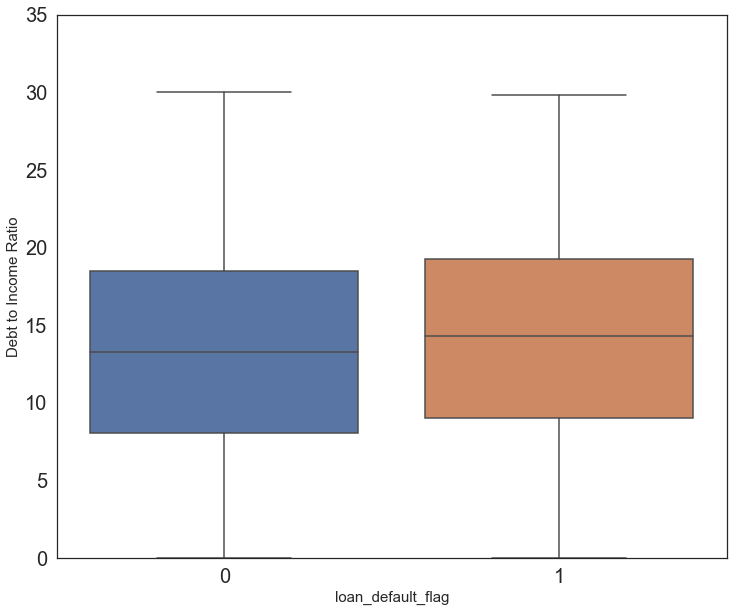

In [48]:
### Debt to Income Ratio
plt.figure(figsize=(12,10))
ax1 = sns.boxplot(x='loan_default_flag', y='dti', data=loans)
ax1.set_ybound(lower=0, upper=35)
ax1.set_xlabel('loan_default_flag',fontsize=15)
ax1.set_ylabel('Debt to Income Ratio',fontsize=15)
ax1.tick_params(labelsize=20)
plt.show()

- #### Observations
    - Defaulting loans(i.e. loan_default_flag=1) have a higher Debt to Income Ratio(DTI). Increased debt will bring down borrower's ability to repay

### <div id="HomeOwnership"></div> Home Ownership
Let us check, if the Home Ownership correlates to whether a loan will have a repayment or defaults

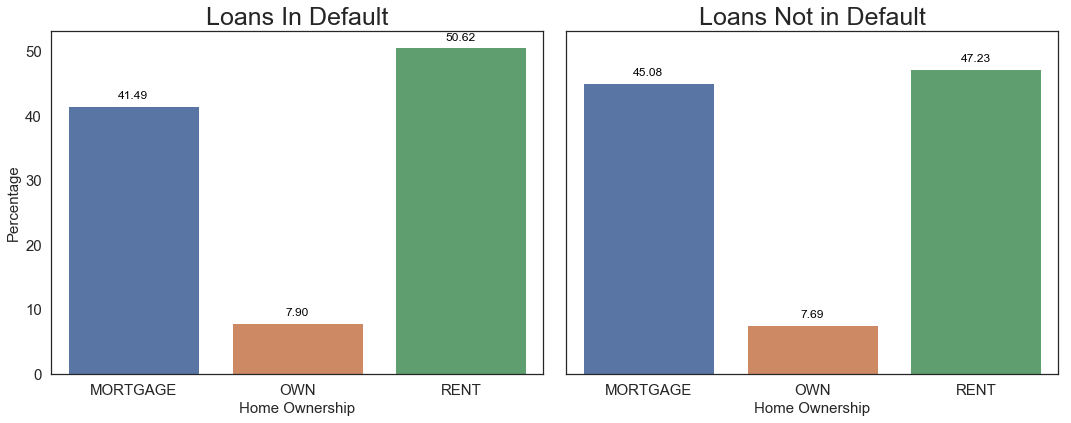

In [49]:
### Home Ownership
df=loans[(loans['home_ownership']=='RENT') | (loans['home_ownership']=='MORTGAGE') | (loans['home_ownership']=='OWN')]
loanNotInDefault = len(df[df['loan_default_flag'] == 0])
loanInDefault = len(df[df['loan_default_flag'] == 1])

f, (ax1, ax2) = plt.subplots(1, 2, sharey=True, figsize=(15, 6))

g1=sns.barplot(x='home_ownership', y='id', data=df[df['loan_default_flag'] == 1], 
            estimator=lambda x: len(x) / loanInDefault * 100,
            ax=ax1, order=['MORTGAGE', 'OWN', 'RENT'], palette='deep')
g2=sns.barplot(x='home_ownership', y='id', data=df[df['loan_default_flag'] == 0], 
            estimator=lambda x: len(x) / loanNotInDefault * 100,
            ax=ax2, order=['MORTGAGE', 'OWN', 'RENT'], palette='deep')


ax1.set_title('Loans In Default',fontsize=25)
ax2.set_title('Loans Not in Default',fontsize=25)
ax1.set_xlabel('Home Ownership',fontsize=15)
ax2.set_xlabel('Home Ownership',fontsize=15)
ax1.tick_params(labelsize=15)
ax2.tick_params(labelsize=15)
ax1.set_ylabel('Percentage',fontsize=15)
ax2.set_ylabel('')

ax=g1
for p in ax.patches:
    ax.annotate("%.2f" % p.get_height(), (p.get_x() + p.get_width() / 2., p.get_height()),
                 ha='center', va='center', fontsize=12, color='black', xytext=(0, 10),
                 textcoords='offset points')
ax=g2
for p in ax.patches:
    ax.annotate("%.2f" % p.get_height(), (p.get_x() + p.get_width() / 2., p.get_height()),
                 ha='center', va='center', fontsize=12, color='black', xytext=(0, 10),
                 textcoords='offset points')
    
plt.tight_layout()
plt.show()

- #### Observations
    - There are 3 main classifications for home ownership: mortgage (outstanding mortgage payment), own (home is owned outright), and rent
    - Customers with own home default the least, followed by those who have mortagage and finally those who rent

### <div id="lengthOfEmployment"></div> Length of Employment
Let us check, if Length of Employment correlates to whether a loan will have a repayment or defaults

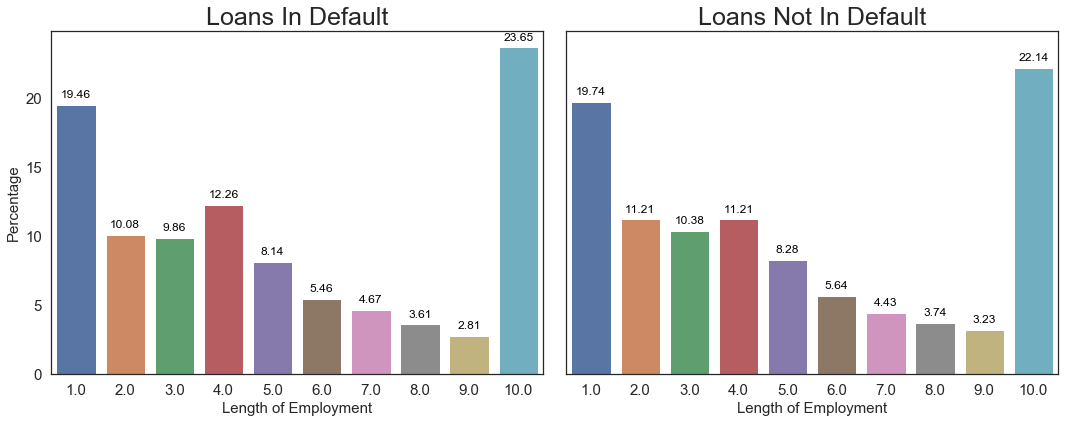

In [50]:
### Length of Employment
loanNotInDefault = len(loans[loans['loan_default_flag'] == 0])
loanInDefault = len(loans[loans['loan_default_flag'] == 1])

f, (ax1, ax2) = plt.subplots(1, 2, sharey=True, figsize=(15, 6))

g1=sns.barplot(x='emp_length_years', y='id', data=loans[loans['loan_default_flag'] == 1].sort_values('emp_length_years', inplace=False), 
            estimator=lambda x: len(x) / loanInDefault * 100,
            ax=ax1, palette='deep')
g2=sns.barplot(x='emp_length_years', y='id', data=loans[loans['loan_default_flag'] == 0].sort_values('emp_length_years', inplace=False), 
            estimator=lambda x: len(x) / loanNotInDefault * 100,
            ax=ax2, palette='deep')

ax1.set_title('Loans In Default',fontsize=25)
ax2.set_title('Loans Not In Default',fontsize=25)
ax1.set_xlabel('Length of Employment',fontsize=15)
ax1.set_ylabel('Percentage',fontsize=15)
ax1.set_xlabel('Length of Employment',fontsize=15)
ax2.set_ylabel('')
ax2.set_xlabel('Length of Employment',fontsize=15)
ax1.tick_params(labelsize=15)
ax2.tick_params(labelsize=15)

ax=g1
for p in ax.patches:
    ax.annotate("%.2f" % p.get_height(), (p.get_x() + p.get_width() / 2., p.get_height()),
                 ha='center', va='center', fontsize=12, color='black', xytext=(0, 10),
                 textcoords='offset points')
ax=g2
for p in ax.patches:
    ax.annotate("%.2f" % p.get_height(), (p.get_x() + p.get_width() / 2., p.get_height()),
                 ha='center', va='center', fontsize=12, color='black', xytext=(0, 10),
                 textcoords='offset points')

plt.tight_layout()
plt.show()

- #### Observations
    - Employees who are having service of 10+ years have lower percentage of the total Defaults than the No Defaults

## <div id="univariateAnalysis"></div> Univariate Analysis 

### <div id="loanStatusTrend"></div> Loan Status Trend

In [51]:
### DataFrame created for loan status for further analysis.

loan_fullypaid=loans.loc[(loans['loan_status']=='Fully Paid')]
loan_chargedoff=loans.loc[(loans['loan_status']=='Charged Off')]

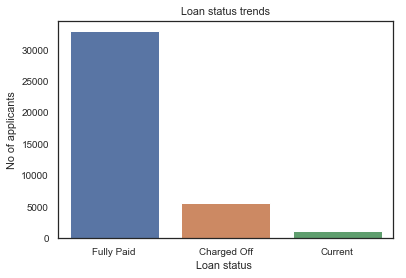

In [52]:
sns.countplot('loan_status',data=loans)
plt.xlabel("Loan status ")
plt.ylabel("No of applicants")
plt.title("Loan status trends")
plt.show()

### ~5600 loans are chargedoff.

### <div id="purposeTrendAnalysis"></div> Purpose Trend Analysis

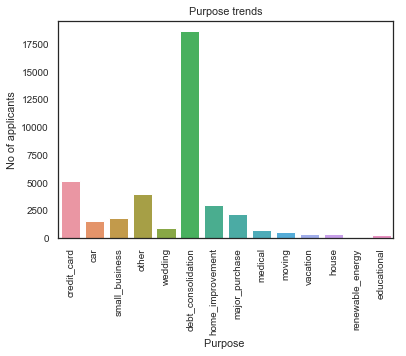

In [53]:
sns.countplot('purpose',data=loans)
plt.xlabel("Purpose ")
plt.ylabel("No of applicants")
plt.title("Purpose trends")
plt.xticks(rotation=90)
plt.show()

## Debt consolidation is the top reason for borrowers taking loans

### <div id="gradeInterestRateTrendAnalysis"></div> Grade/Interest Rate Trend Analysis

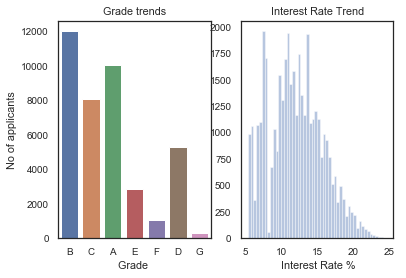

In [54]:
plt.subplot(1,2,1)
sns.countplot('grade',data=loans)
plt.xlabel("Grade ")
plt.ylabel("No of applicants")
plt.title("Grade trends")

plt.subplot(1,2,2)
sns.distplot(loans['intrate_int'],label='Interest Rate', kde=False)
plt.xlabel(" Interest Rate %")
plt.title("Interest Rate Trend")
plt.show()

### Grade B is the top catgeory and interest rate corresponding to Grade A ( 6-9%) and Grade B ( 10-14%) are seen higher.

### <div id="annualIncomeAnalysis"></div> Annual Income Analysis

(0, 400000)

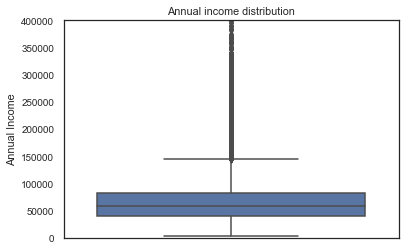

In [55]:
sns.boxplot(y=loans['annual_inc'])
plt.title("Annual income distribution")
plt.ylabel("Annual Income")
plt.ylim(0,400000)

### Median is ~60K 

### <div id="loanTermanalysis"></div> Loan Term analysis

Text(0.5,1,'Term in Months trends')

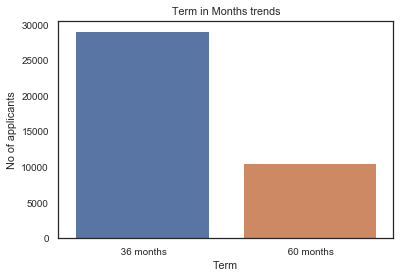

In [56]:
sns.countplot('term',data=loans)
plt.xlabel("Term")
plt.ylabel("No of applicants")
plt.title("Term in Months trends")

## Most of the loans ( ~ 73%)  issued are for 36 month period.

### <div id="borrowersEmploymentLengthAnalysis"></div> Borrower's Employment Length Analysis

Text(0.5,1,'Employment Length trends')

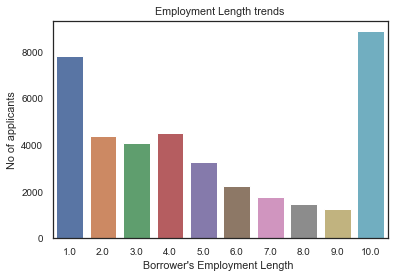

In [57]:
sns.countplot('emp_length_years',data=loans)
plt.xlabel("Borrower's Employment Length ")
plt.ylabel("No of applicants")
plt.title("Employment Length trends")

## Employees <1 year and 10+ years are the top applicants.

### <div id="statewiseAnalysis"></div> State-wise Analysis

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49]),
 <a list of 50 Text xticklabel objects>)

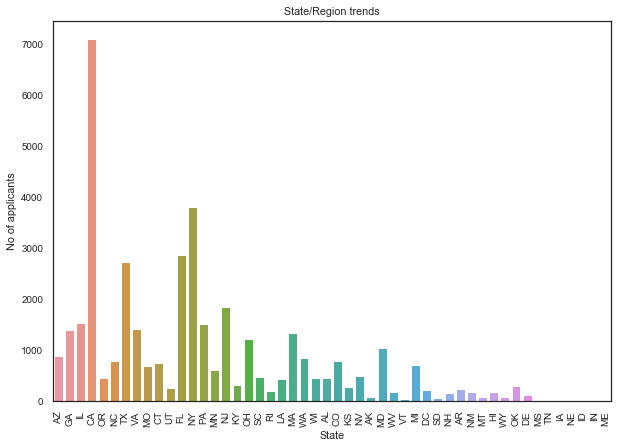

In [58]:
plt.figure(figsize=(10,7))
sns.countplot('addr_state',data=loans)
plt.xlabel("State")
plt.ylabel("No of applicants")
plt.title("State/Region trends")
plt.xticks(rotation=90)

## Applicants from CA top the list of borrowers

### <div id="OtherNumericaldataAnalysis"></div> Other Numerical data analysis

In [59]:
numerical_analysis=loans[['loan_amnt', 'funded_amnt','dti','delinq_2yrs','inq_last_6mths','open_acc','pub_rec','revol_bal','total_acc']]
numerical_analysis.describe()

,loan_amnt,funded_amnt,dti,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,revol_bal,total_acc
count,39717.00,39717.00,39717.00,39717.00,39717.00,39717.00,39717.00,39717.00,39717.00
mean,11219.44,10947.71,13.32,0.15,0.87,9.29,0.06,13382.53,22.09
std,7456.67,7187.24,6.68,0.49,1.07,4.40,0.24,15885.02,11.40
min,500.00,500.00,0.00,0.00,0.00,2.00,0.00,0.00,2.00
25%,5500.00,5400.00,8.17,0.00,0.00,6.00,0.00,3703.00,13.00
50%,10000.00,9600.00,13.40,0.00,1.00,9.00,0.00,8850.00,20.00
75%,15000.00,15000.00,18.60,0.00,1.00,12.00,0.00,17058.00,29.00
max,35000.00,35000.00,29.99,11.00,8.00,44.00,4.00,149588.00,90.00


### <div id="segmentedUnivariateAnalysis"></div> Segmented Univariate Analysis 

### <div id="loanStatusPurposeAnalysis"></div> Loan Status - Purpose Analysis

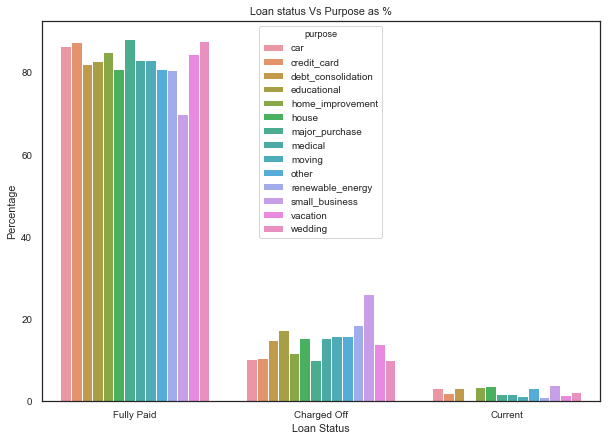

In [60]:
plt.figure(figsize=(10,7))
percentage_purpose = (loans['loan_status']
           .groupby(loans['purpose'])
           .value_counts(normalize=True)
           .rename('percentage')
           .reset_index())
percentage_purpose['percentage']=percentage_purpose['percentage']*100
    
sns.barplot(x="loan_status", y="percentage",hue="purpose", data=percentage_purpose)
plt.xlabel("Loan Status")
plt.ylabel("Percentage")
plt.title("Loan status Vs Purpose as %")
plt.show()

#### Bad performance #################
## Small business loans are only 70% fully paid and about 25% chargedoff. 
## House loans are ~80% fully paid and ~18% chargedoff
## Education loans are ~81% fullypaid and ~18% chargedoff.
## Renewable energy loans are ~80% fully paid and ~19% Chargedoff.

### <div id="LoanStatusVsRegion"></div> Loan Status Vs Region

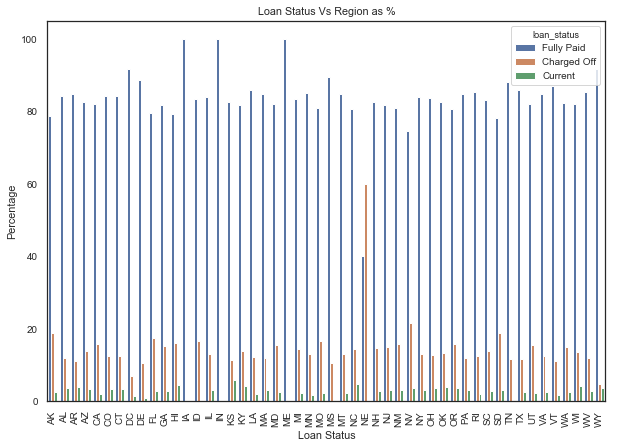

In [61]:
## Loan Status Vs Region
plt.figure(figsize=(10,7))
percentage_reg = (loans['loan_status']
           .groupby(loans['addr_state'])
           .value_counts(normalize=True)
           .rename('Percentage')
           .reset_index())
percentage_reg['Percentage']=percentage_reg['Percentage']*100
    
sns.barplot(x="addr_state",y="Percentage",hue="loan_status", data=percentage_reg)
plt.xlabel("Loan Status")
plt.xticks(rotation=90)
plt.ylabel("Percentage")
plt.title("Loan Status Vs Region as %")
plt.show()

## Borrowers from NE State have a higher default %( ~60% loans defaulted ) compared to the number of loans issued.

### <div id="LoanStatusVsVerificationStatus"></div> Loan Status Vs Verification Status

Text(0.5,1,'AnnualInc Verficiation')

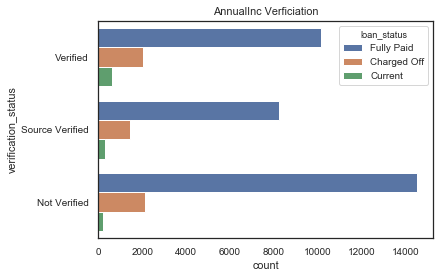

In [62]:
sns.countplot(y="verification_status", hue='loan_status', data=loans)
plt.title("AnnualInc Verficiation")

## Verficiation /no verification - doesnt seem to have major influence. 
## However, not all verified are verified by LC itself. This adds the element of risk

### <div id="BivariateAnalysis"></div> Bivariate Analysis

### <div id="LoanAmountIssuedovertheyears"></div> Loan Amount issued over the years

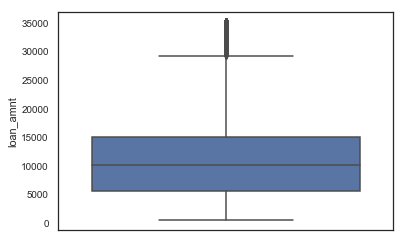

In [63]:
# removing outliers of loan amount 

sns.boxplot(y=loans['loan_amnt'])
# Value above 30K is outliers.

loans_less_30=loans.loc[(loans['loan_amnt'] < 30000)]

Text(0,0.5,'Number of Loans')

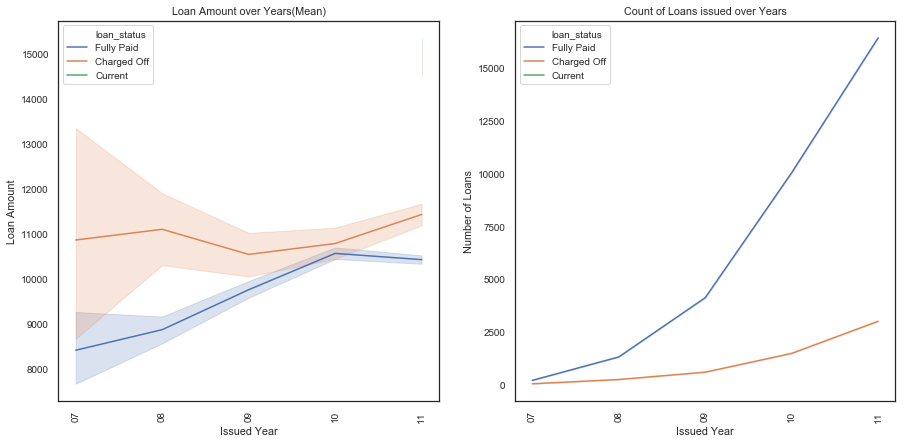

In [64]:
plt.figure(figsize=(15,7))
plt.subplot(1,2,1)
sns.lineplot(x="issue_yr", y="loan_amnt",  hue="loan_status",data=loans_less_30, estimator ='mean')
plt.title("Loan Amount over Years(Mean)")
plt.xlabel("Issued Year")
plt.xticks(rotation=90)
plt.ylabel("Loan Amount")

plt.subplot(1,2,2)
sns.lineplot(x="issue_yr",y="loan_amnt",  hue="loan_status",data=loans_less_30, estimator =lambda y: len(y))
plt.title("Count of Loans issued over Years")
plt.xlabel("Issued Year")
plt.xticks(rotation=90)
plt.ylabel("Number of Loans")

# Number of loans issued over the years has increased steeply
# Mean loan amount of defaulted loans is higher than the fully paid loans.

### <div id="AnnualIncomeVsGradeAnalysis"></div> Annual Income Vs Grade Analysis

(0, 600000)

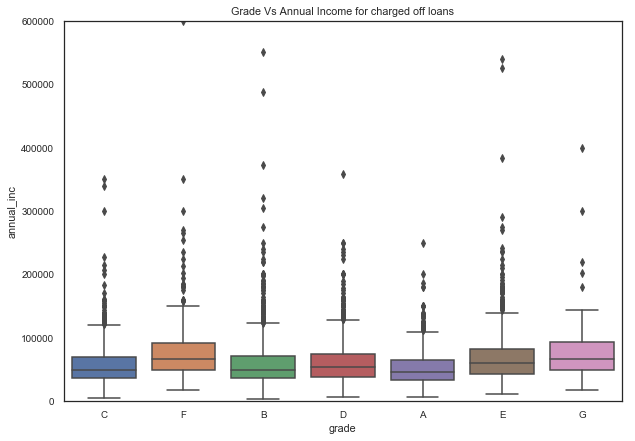

In [65]:
plt.figure(figsize=(10,7))
sns.boxplot(x='grade', y='annual_inc', data=loan_chargedoff )
plt.title("Grade Vs Annual Income for charged off loans")
plt.ylim(0,600000)

### There is a positive correlation seen in assignment of grade to annual income .
### Higher the annual income, there is a possibility of assigning the higher grade/interest.

### <div id="PurposeVsGrade"></div> Purpose Vs Grade

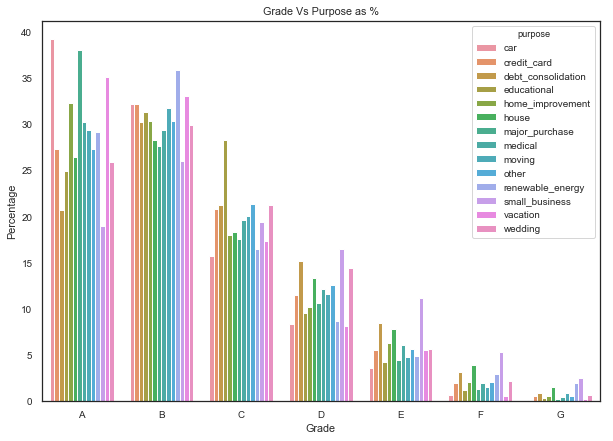

In [66]:
plt.figure(figsize=(10,7))
percentage_grade = (loans['grade']
           .groupby(loans['purpose'])
           .value_counts(normalize=True)
           .rename('Percentage')
           .reset_index())
percentage_grade['Percentage']=percentage_grade['Percentage']*100
    
sns.barplot(x="grade", y="Percentage",hue="purpose", data=percentage_grade)
plt.xlabel("Grade")
plt.ylabel("Percentage")
plt.title("Grade Vs Purpose as %")
plt.show()

### Most loans for all purposes are provided against Grade A,B,C. 

### Bad Performance ####
### < 50% of Small business loans are issued under Grade A& B.Small business get fully paid only 70%.
### < 50% of House loans are issued under Grade A&B. House loans get fully paid only 80%

### <div id="corr"></div> Correlation between Loan amount, funded amount, dti & revol_bal

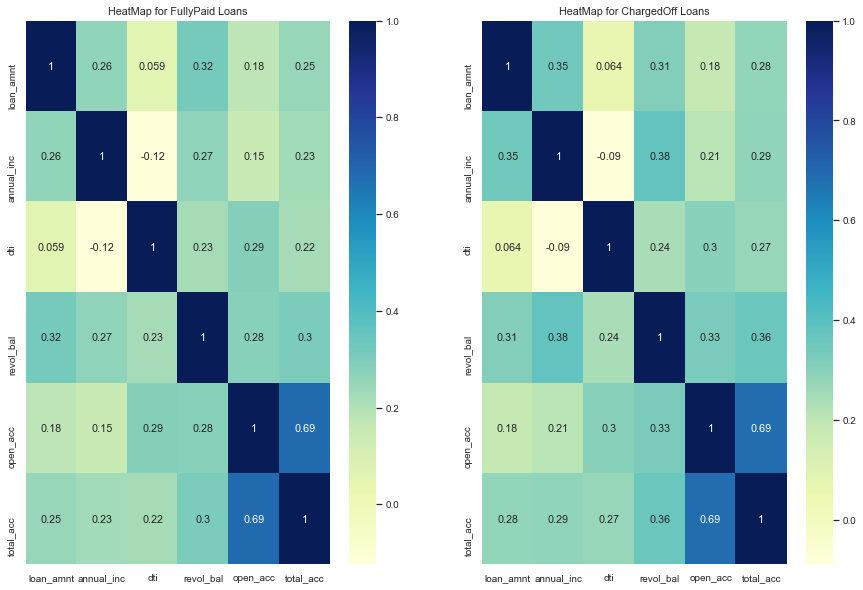

In [67]:
# Correlation between Loan amount, funded amount, dti & revol_bal

plt.figure(figsize=(15,10))
plt.subplot(1,2,1)
loan_fullypaid_heatmap=loan_fullypaid[['loan_amnt', 'annual_inc', 'dti','revol_bal','open_acc','total_acc']]
sns.heatmap(loan_fullypaid_heatmap.corr(), cmap="YlGnBu", annot=True)
plt.title('HeatMap for FullyPaid Loans')

plt.subplot(1,2,2)
loan_chargedoff_heatmap=loan_chargedoff[['loan_amnt', 'annual_inc', 'dti','revol_bal','open_acc','total_acc']]
sns.heatmap(loan_chargedoff_heatmap.corr(), cmap="YlGnBu", annot=True)
plt.title('HeatMap for ChargedOff Loans')
plt.show()

###### Below trends are observed for defaulted loans:
## Higher positive correlation between dti and loan amount.
## Higher positive correlation between annual income and  loan amount ratio  , annual income and revol bal . This can mean annual income is incorrectly mentioned by borrowers.
## Higher positive correlation between Total Acc and Loan amt /Annual income.

### <div id="Summary"></div> Summary


Key Attributes leading to loan defaults

1. Type of Loan - Small business, House , Education & Renewable energy
2. Loans of higher interest rate - Grade C,D 
3. Annual Income & Verification :
    Median of charged off borrowers is slightly less than faullypaid .
4.  However, annual income ratio to loan amount is seen higher for chargedoff loans. 
5.  Annual income verification should be done by LC to ensure this ratio is not providing misleading info.
6. Term : 60 month terms loans are defaulted 35% of the time. 
7. Employment length : Borrowers of 10+ years and around 7 years are seen to default more % wise. 
8. Region : Borrowers from NE state have a poor performance of 60% default.
9. Correlation of dtil to loan amount - > higher than 0.059 - can cause default.